In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("ks-projects-201801.csv")
df_state = df['state'].value_counts()

In [4]:
df_state

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [5]:
df_state_r=df_state['failed':'canceled']
df_state_r['others']=df_state['undefined':].sum()
df_state_r

failed        197719
successful    133956
canceled       38779
others          8207
Name: state, dtype: int64

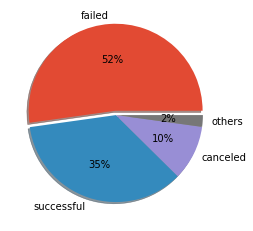

In [31]:
explode=[0.05,0,0,0]
plt.pie(df_state_r.values, labels=df_state_r.index, explode = explode,autopct='%.0f%%',shadow=True)
plt.savefig("x.png",bbox_inches='tight',dpi=300)

In [7]:
df_pledged = df.sort_values(by='pledged',ascending=False).head(100)

In [8]:
df_pledged['pledged'].values

array([20338986.27, 13285226.36, 12779843.49, 12393139.69, 10266845.74,
       10035296.  ,  9192055.66,  8782571.99,  8596474.58,  7072757.  ,
        6565782.5 ,  6465690.3 ,  6333295.77,  6225354.98,  5764229.38,
        5702153.38,  5545991.7 ,  5408916.95,  5333792.84,  5004494.58,
        4961032.74,  4869472.2 ,  4809548.  ,  4729263.13,  4623089.  ,
        4236618.49,  4228060.  ,  4188927.49,  4079204.52,  4075739.  ,
        4005111.42,  3999795.77,  3986929.49,  3845170.68,  3771474.81,
        3745896.  ,  3560642.66,  3534663.91,  3429235.52,  3401361.08,
        3390551.  ,  3336371.92,  3327757.  ,  3307773.49,  3271809.31,
        3257695.25,  3246588.55,  3215679.79,  3203762.  ,  3198516.1 ,
        3193364.  ,  3169610.66,  3126114.96,  3112511.  ,  3105473.1 ,
        3055118.  ,  3051004.08,  3007370.36,  2990330.  ,  2952508.59,
        2950874.77,  2945885.21,  2933252.19,  2923611.06,  2849064.07,
        2828267.  ,  2804475.23,  2785537.13,  2762571.78,  2746

Text(0, 0.5, 'Amount')

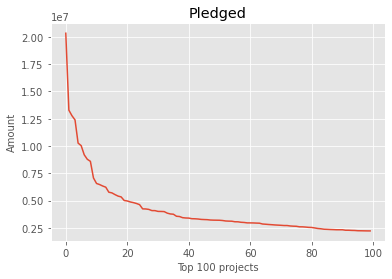

In [9]:
plt.style.use('ggplot')
plt.plot(df_pledged['pledged'].values)
plt.title("Pledged", loc='center')
plt.xlabel("Top 100 projects", fontsize=10)
plt.ylabel("Amount", fontsize=10)

In [10]:
df_failed = df[df['state']=='failed']
df_failed['percent'] = df_failed['pledged']/df_failed['goal']
df_failed_r=df_failed[df_failed['percent']<1]
df_f = df_failed_r.sort_values(by='percent',ascending=False)

/var/folders/03/93x2wfrd1l1f9znxkbc3zjfh0000gn/T/ipykernel_92313/817370554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_failed['percent'] = df_failed['pledged']/df_failed['goal']


Text(0, 0.5, 'Percentage')

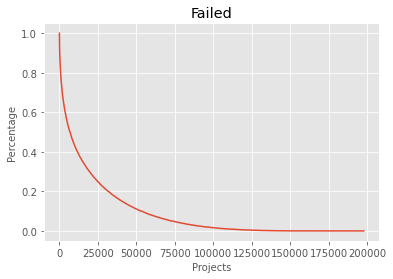

In [11]:
plt.style.use('ggplot')
plt.plot(df_f['percent'].values)
plt.title("Failed", loc='center')
plt.xlabel("Projects", fontsize=10)
plt.ylabel("Percentage", fontsize=10)

In [12]:
df['launched_time'] = pd.to_datetime(df['launched'])
df['deadline_time'] = pd.to_datetime(df['deadline'])

In [13]:
def year_data(y):
    return df[(df['launched_time']>=str(y)) & (df['launched_time']< str(y+1))]
 
df_year_count=[]
df_year=list(range(2010,2018))
for y in range(2010,2018):
    df_year_count.append(year_data(y)['ID'].count())

In [14]:
df_year_count

[10519, 26237, 41165, 44851, 67745, 77300, 57184, 52200]

In [15]:
df_year

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

Text(0, 0.5, 'Amount')

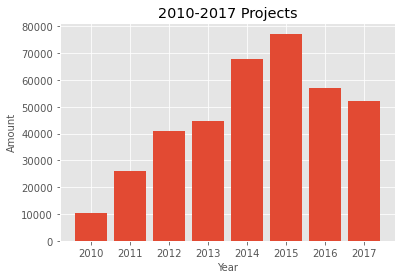

In [16]:
plt.bar(df_year,df_year_count)
plt.title("2010-2017 Projects", loc='center')
plt.xlabel("Year", fontsize=10)
plt.ylabel("Amount", fontsize=10)

In [17]:
df_year_s=[]  
for y in range(2010,2018):
    df_year_s.append(year_data(y)[year_data(y)['state']=='successful']['ID'].count())

In [18]:
df_year_s

[4593, 12171, 17892, 19415, 21107, 20971, 18766, 18462]

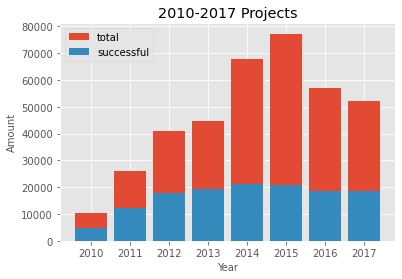

In [19]:
plt.bar(df_year,df_year_count, label='total')
plt.bar(df_year,df_year_s,label='successful')
plt.title("2010-2017 Projects", loc='center')
plt.xlabel("Year", fontsize=10)
plt.ylabel("Amount", fontsize=10)
plt.legend(loc="upper left")

In [20]:
from datetime import timedelta
df['launched_time'] = pd.to_datetime(df['launched'])
df['deadline_time'] = pd.to_datetime(df['deadline'])
df['period'] = df['deadline_time']-df['launched_time'] 
df['period_num'] = df['period']/timedelta(1)

In [21]:
df_category=df['main_category'].value_counts()

In [22]:
df_category.index

Index(['Film & Video', 'Music', 'Publishing', 'Games', 'Technology', 'Design',
       'Art', 'Food', 'Fashion', 'Theater', 'Comics', 'Photography', 'Crafts',
       'Journalism', 'Dance'],
      dtype='object')

In [23]:
cp=[]
for c in df_category.index:
    cp.append((df[df['main_category']==c]['period_num'].std(),c))

In [24]:
cp

[(84.10647409000673, 'Film & Video'),
 (65.98479320496912, 'Music'),
 (84.56785706508474, 'Publishing'),
 (10.823606601472749, 'Games'),
 (11.82850601262381, 'Technology'),
 (85.32771998693889, 'Design'),
 (89.22722736352362, 'Art'),
 (12.069096777595245, 'Food'),
 (10.95077823850793, 'Fashion'),
 (141.69977397972656, 'Theater'),
 (12.151280028755583, 'Comics'),
 (13.860191764179152, 'Photography'),
 (11.224963287695703, 'Crafts'),
 (14.337408300041798, 'Journalism'),
 (13.064251242740088, 'Dance')]

In [25]:
cp.sort()
cp_index=[]
cp_value=[]
for x, y in cp:
    cp_value.append(x)
    cp_index.append(y)

In [26]:
cp_value

[10.823606601472749,
 10.95077823850793,
 11.224963287695703,
 11.82850601262381,
 12.069096777595245,
 12.151280028755583,
 13.064251242740088,
 13.860191764179152,
 14.337408300041798,
 65.98479320496912,
 84.10647409000673,
 84.56785706508474,
 85.32771998693889,
 89.22722736352362,
 141.69977397972656]

In [27]:
cp_index

['Games',
 'Fashion',
 'Crafts',
 'Technology',
 'Food',
 'Comics',
 'Dance',
 'Photography',
 'Journalism',
 'Music',
 'Film & Video',
 'Publishing',
 'Design',
 'Art',
 'Theater']

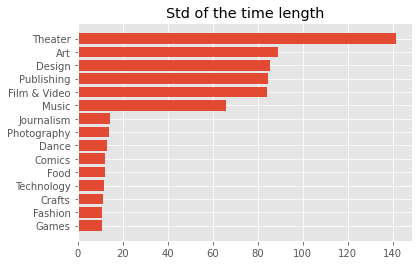

In [30]:
plt.barh(cp_index,cp_value)
plt.title("Std of the time length", loc='center')
plt.savefig("x.png",bbox_inches='tight',dpi=300)